<a href="https://colab.research.google.com/github/NguyenBinh0707/pythonProject/blob/master/%C4%90%E1%BB%93_%C3%A1n_Suy_di%E1%BB%85n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
from scipy.stats import t
import pandas as pd
import xlrd
from scipy import stats
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.ticker as ticker
from pingouin import ancova

#pip install#

In [ ]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pingouin 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 183 kB 4.9 MB/s 
     |████████████████████████████████| 9.8 MB 48.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=c72a8feda0532f2cf8bec3a049d79b22380762c9df67476e3736eee386da452a
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=323704bc6d6edcce548ef9b50f28feb778d79806c3d1d463640f4f78f1068bbb
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


#--------------------------#

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Baitap/Diet_R.csv')
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [ ]:
pw = df['pre.weight']
display(pw)
aw = df['weight6weeks']
display(aw)

0      60
1     103
2      58
3      60
4      64
     ... 
73     83
74     84
75     85
76     87
77     88
Name: pre.weight, Length: 78, dtype: int64

0      60.0
1     103.0
2      54.2
3      54.0
4      63.3
      ...  
73     80.2
74     79.9
75     79.7
76     77.8
77     81.9
Name: weight6weeks, Length: 78, dtype: float64

pw ở đây tức là pre weight tức cấn nặng trước sáu tuần

aw ở đây tức là after weight tức cân nặng sau sáu tuần

Ignore diet and test to see if weight has been lost.
(Bỏ qua chế độ ăn và kiểm tra xem sau sáu tuần đã giảm cân chưa)
Tức ta có hai giả thuyết

$H_{0}: $ Sau sáu tuần vẫn chưa giảm cân

$H_{1}: $ Sau sáu tuần đã giảm cân

Với độ chính xác 95% ta có:

In [ ]:
alpha = 0.05
ts, pvalue = stats.ttest_rel(pw,aw)

In [ ]:
print(pvalue)

1.1722360462415227e-21


In [ ]:
if(pvalue >  alpha):
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0, tức là không có thay đổi gì sau sáu tuần")
else:
  print("Có bằng chứng để bác bỏ giả thuyết H0 tức là sau sáu tuần đã có giảm cân")

Có bằng chứng để bác bỏ giả thuyết H0 tức là sau sáu tuần đã có giảm cân


Viết một cột Bảng cân đã giảm bằng cách lấy cân trước khi giảm trừ cân sau khi giảm


In [ ]:
cw = pw - aw
df = df.assign(weightloss=cw)
display(df)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightloss
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7
...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,2.8
74,75,1,49,177,84,3,79.9,4.1
75,76,1,28,164,85,3,79.7,5.3
76,77,1,40,167,87,3,77.8,9.2


In [ ]:
def Count(n):
  dem = 0
  for i in range(0,78):
    if df['Diet'][i]==n:
      dem = dem +1 
  return dem

In [ ]:
print("Có ",Count(1), "người sử dụng phương pháp giảm cân 1")
print("Có ",Count(2), "người sử dụng phương pháp giảm cân 2")
print("Có ",Count(3), "người sử dụng phương pháp giảm cân 3")

Có  24 người sử dụng phương pháp giảm cân 1
Có  27 người sử dụng phương pháp giảm cân 2
Có  27 người sử dụng phương pháp giảm cân 3


Vậy phương pháp giảm cân 1 có ít người sử dụng nhất

Phương pháp 2 và 3 có cùng số người sử dụng như nhau

In [ ]:
wl1 = []
wl2 = []
wl3 = []
for i in range(78):
  if df['Diet'][i] == 1:
    wl1.append(df['weightloss'][i]) 
  elif  df['Diet'][i] == 2:
    wl2.append(df['weightloss'][i])
  elif df['Diet'][i] == 3:
    wl3.append(df['weightloss'][i])

In [ ]:
wl1 = np.asarray(wl1)
wl2 = np.asarray(wl2)
wl3 = np.asarray(wl3)
print(wl1,"\n",wl2,"\n",wl3)


[ 3.8  6.   0.7  2.9  2.8  2.   2.   8.5  1.9  3.1  1.5  3.   3.6  0.9
 -0.6  1.1  4.5  4.1  9.   2.4  3.9  3.5  5.1  3.5] 
 [ 0.   0.  -2.1  2.   1.7  4.3  7.   0.6  2.7  3.6  3.   2.   4.2  4.7
  3.3 -0.5  4.2  2.4  5.8  3.5  5.3  1.7  5.4  6.1  7.9 -1.4  4.3] 
 [7.  5.6 3.4 6.8 7.8 5.4 6.8 7.2 7.  7.3 0.9 7.6 4.1 6.3 5.  2.5 0.9 3.5
 0.5 2.8 8.6 4.5 2.8 4.1 5.3 9.2 6.1]


Kiểm tra phân phối chuẩn

Ta có

$H_{0}$: Nhóm I được lấy phân phối chuẩn

$H_{1}$: Nhóm I không được lấy từ phân phối chuẩn


In [ ]:
def check_p(p_value,i):
  if p_value > 0.05:
    print(f"Không có bằng chứng cho thấy nhóm thứ {i+1} không tuân theo phân phối chuẩn")
  else:
    print(f"Có bằng chứng cho thấy nhóm thứ {i+1} không tuân theo phân phối chuẩn")

In [ ]:
p_value = stats.shapiro(wl1)[1]
print(p_value)
check_p(p_value,0)

0.07748671621084213
Không có bằng chứng cho thấy nhóm thứ 1 không tuân theo phân phối chuẩn


In [ ]:
p_value = stats.shapiro(wl2)[1]
print(p_value)
check_p(p_value,1)

0.961176335811615
Không có bằng chứng cho thấy nhóm thứ 2 không tuân theo phân phối chuẩn


In [ ]:
p_value = stats.shapiro(wl3)[1]
print(p_value)
check_p(p_value,2)

0.37203603982925415
Không có bằng chứng cho thấy nhóm thứ 3 không tuân theo phân phối chuẩn


Kiểm định sự đồng nhất giữa phương sai các nhóm

Với mức ý nghĩa 0.05

Ta có các giả thuyết

$H_{0}$: Không có sự khác biệt về phương sai của các nhóm

$H_{1}$: Không có bằng chứng để nói không có sự khác biệt về phương sai của các nhóm, ( tồn tại bằng chứng )

In [ ]:
stat_value ,p_value = stats.levene(wl1,wl2,wl3)                   
print(f"P value: {p_value}")

P value: 0.5376731304274011


Vì P > 0.05 nên có thể nói rằng ta không có bằng chứng để bác bỏ giả thuyết $H_{0}$

Vì các nhóm độc lập, tuân theo phân phối chuẩn và có sự đồng nhất về phương sai giữa các nhóm nên ta có thể tiến hành kiểm định ANOVA:

Với mức ý nghĩa 0.05

$H_{0}$: Không có sự khác biệt về độ giảm cân

$H_{1}$: Không có bằng chứng để nói không có sự khác biệt về độ giảm cân của các nhóm

In [ ]:
stat_value ,p_value = stats.f_oneway(wl1,wl2,wl3)                   
print(f"P value: {p_value}")

P value: 0.0032290142385893524


Vì p value bé hơn 0.05 nên chúng ta bác bỏ $H_{0}$

Vậy nên tiếp theo ta sẽ dùng t test hai mẫu để có thể tìm ra phương pháp giảm cân nào là tốt nhất

Phương pháp 1 với Phương pháp 3

$H_{0}$ : Pp1 = Pp3 

$H_{1}$: Pp1 < Pp3

Với độ tin cậy là 95% ta có

In [ ]:
stats.ttest_ind(wl1,wl3, alternative='less', trim=0)

Ttest_indResult(statistic=-2.834783037306771, pvalue=0.003322190824870596)

Vậy ta bác bỏ giá thuyết $H_{0}$

Phương pháp 2 với Phương pháp 3

$H_{0}$ : Pp2 = Pp3 

$H_{1}$: Pp1 < Pp3

Với độ tin cậy là 95% ta có

In [ ]:
stats.ttest_ind(wl2,wl3, alternative='less', trim=0)

Ttest_indResult(statistic=-3.1693496673045676, pvalue=0.0012799513226492006)

Sau hai lần kiểm định t test giữa phương pháp 1 và 2 và 3. Ta thấy rằng phương pháp 3 là hiệu quả nhất trong cả 3 phương pháp

In [ ]:
gtnam =[]
dietnam = []
gtnu = []
dietnu = []
for i in range(78):
  if df['gender'][i] == '0':
    gtnam.append(df['weightloss'][i])
    dietnam.append(df['Diet'][i])
  if df['gender'][i] == '1':
    gtnu.append(df['weightloss'][i])
    dietnu.append(df['Diet'][i])

In [ ]:
gtnam = np.asarray(gtnam)
gtnu = np.asarray(gtnu)
display(gtnam)
display(gtnu)

array([ 3.8,  6. ,  0.7,  2.9,  2.8,  2. ,  2. ,  8.5,  1.9,  3.1,  1.5,
        3. ,  3.6,  0.9, -2.1,  2. ,  1.7,  4.3,  7. ,  0.6,  2.7,  3.6,
        3. ,  2. ,  4.2,  4.7,  3.3, -0.5,  7. ,  5.6,  3.4,  6.8,  7.8,
        5.4,  6.8,  7.2,  7. ,  7.3,  0.9,  7.6,  4.1,  6.3,  5. ])

array([-0.6,  1.1,  4.5,  4.1,  9. ,  2.4,  3.9,  3.5,  5.1,  3.5,  4.2,
        2.4,  5.8,  3.5,  5.3,  1.7,  5.4,  6.1,  7.9, -1.4,  4.3,  2.5,
        0.9,  3.5,  0.5,  2.8,  8.6,  4.5,  2.8,  4.1,  5.3,  9.2,  6.1])

Ta có hai giả thuyết
$H_{0}$ : Giới tính 0  $=$ Giới tính 1

$H_{1}$: Giới tính 0 $\neq$ Giới tính 1

Với độ tin cậy là 95% ta có

Ta có thể dùng kiểm định t test để kiểm định hai giới tính có ảnh hưởng đến việc giảm cân hay không

In [ ]:
pvalue = stats.ttest_ind(wl1,wl3, alternative='two-sided', trim=0)[1]
print(pvalue)

0.006644381649741192


Vì pvalue nhỏ hơn 0.05 nên có thể nói rằng ta bác bỏ giả thuyết $H_{0}$ và công nhận rằng giới tính có thể ảnh hưởng trong việc giảm cân

In [ ]:
dff = pd.DataFrame({'GENDER': df['gender'],
                    'DIET': df['Diet'],
                    'WEIGHTLOSS': df['weightloss']})
dff = dff.drop([0,1])
dff

,GENDER,DIET,WEIGHTLOSS
2,0,1,3.8
3,0,1,6.0
4,0,1,0.7
5,0,1,2.9
6,0,1,2.8
...,...,...,...
73,1,3,2.8
74,1,3,4.1
75,1,3,5.3
76,1,3,9.2


In [ ]:
model = ols('WEIGHTLOSS ~ C(GENDER) + C(DIET) + C(GENDER):C(DIET)',
data=dff).fit()
sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
C(GENDER),0.168696,1.0,0.031379,0.859910
C(DIET),60.417220,2.0,5.619026,0.005456
C(GENDER):C(DIET),33.904068,2.0,3.153204,0.048842
Residual,376.329043,70.0,NaN,NaN


Có thể thấy rằng Pvalue của GENDER (giới tính) là 0.85 là cao hơn 0.05 

Điều này chứng tỏ GENDER (giới tính) không ảnh hưởng gì đến việc giảm cân

Pvalue của DIET (Chế độ ăn) nhỏ hơn 0.05 nên sẽ tác động đến việc giảm cân

Vậy có thể thấy rằng chỉ có mỗi DIET (Chế độ ăn) là tác động đến việc giảm cân



In [ ]:
mwnad1 = [] 
mwnad2 = []
mwnad3 = []
mwnud1 = []
mwnud2 = []
mwnud3 = []
def check(a,b,c):
  for i in range(78):
    if df['gender'][i] == b and df['Diet'][i] ==c:
      a.append(df['weightloss'][i])
check(mwnad1,'0',1)
check(mwnad2,'0',2)
check(mwnad3,'0',3)
check(mwnud1,'1',1)
check(mwnud2,'1',2)
check(mwnad3,'1',3)

In [ ]:
for i in range(78):
  if df['gender'][i] == '1' and df['Diet'][i] ==3:
    mwnud3.append(df['weightloss'][i])
print(mwnud3)

[2.5, 0.9000000000000057, 3.5, 0.5, 2.799999999999997, 8.599999999999994, 4.5, 2.799999999999997, 4.099999999999994, 5.299999999999997, 9.200000000000003, 6.099999999999994]


In [ ]:
mwnad1 = np.asarray(mwnad1)
mwnad2 = np.asarray(mwnad2)
mwnad3 = np.asarray(mwnad3)
mwnud1 = np.asarray(mwnud1)
mwnud2 = np.asarray(mwnud2)
mwnud3 = np.asarray(mwnud3)
dt1 = []
dt2 = []
dt1.append(mwnad1.mean())
dt1.append(mwnad2.mean())
dt1.append(mwnad3.mean())
dt2.append(mwnud1.mean())
dt2.append(mwnud2.mean())
dt2.append(mwnud3.mean())


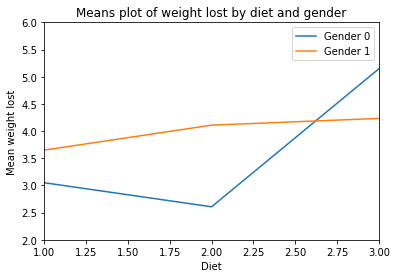

In [ ]:
plt.title("Means plot of weight lost by diet and gender")
plt.xlabel("Diet")
plt.ylabel("Mean weight lost")
plt.plot([1, 2, 3], dt1,label = 'Gender 0')
plt.axis([1,3,2,6])
plt.plot([1, 2, 3], dt2,label = 'Gender 1')
plt.xlim(1, 3)
plt.legend()
plt.show()

In [ ]:
dfff = pd.DataFrame({'GENDER': df['gender'],
                    'DIET': df['Diet'],
                    'WEIGHTLOSS': df['weightloss'],
                     'HEIGHT': df['Height']})
dfff = dfff.drop([0,1])
dfff

,GENDER,DIET,WEIGHTLOSS,HEIGHT
2,0,1,3.8,159
3,0,1,6.0,192
4,0,1,0.7,170
5,0,1,2.9,171
6,0,1,2.8,170
...,...,...,...,...
73,1,3,2.8,183
74,1,3,4.1,177
75,1,3,5.3,164
76,1,3,9.2,167


In [ ]:
model = ols('WEIGHTLOSS ~ C(GENDER) + C(DIET) + C(HEIGHT) + C(GENDER):C(DIET)',
data=dfff).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(GENDER),0.668196,1.0,0.141456,0.709174
C(DIET),32.468928,2.0,3.436811,0.043713
C(HEIGHT),215.723261,36.0,1.268564,0.243983
C(GENDER):C(DIET),26.340498,2.0,2.788122,0.075640
Residual,160.605782,34.0,NaN,NaN
